# DATA-611 Final Project - Eland - Model Metrics

This notebook handles exploring, cleaning, and feature engineering for the credit card dataset.

It starts with the `model.pkl` file and uses the `test.csv` file for metrics evaluation

This notebook was originally developed in Azure Machine Learning Studio against the Python 3 (ipykernel) kernel on a STANDARD_E4DS_V4 compute instance

## Dependencies

In [72]:
%pip install pandas
%pip install scikit-learn
%pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [73]:
# Set up Plotly express for visualization
%pip install plotly

import plotly.express as px

px.defaults.template = 'plotly_white'
px.defaults.color_continuous_scale = px.colors.sequential.Plasma
px.defaults.color_discrete_sequence = px.colors.qualitative.Vivid

Note: you may need to restart the kernel to use updated packages.


## Model Loading

In [74]:
import pickle

# Read the model from model.pkl
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

model

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                                       metric=f1, n_jobs=4,
                                       per_run_time_limit=4320,
                                       time_left_for_this_task=10800))])

## Test Data Loading

In [75]:
import pandas as pd

df_test = pd.read_csv('test.csv', index_col=0)
df_test.head()

,Credit Amount,Repay Delay Sep,Repay Delay Aug,Repay Delay Jul,Prior Pay Sep,Prior Pay Aug,Prior Pay Jul,Graduate School,Is Married,Prior Pay Total,Repay Delay Total,Defaulted
36338,10000,1,2,0,0,1359,1299,0,False,4077,4,True
15434,30000,0,0,0,1595,2000,5000,0,False,14295,0,False
26594,60000,0,0,0,2351,2242,3067,0,False,11653,0,True
14015,60000,2,0,0,2717,2929,2429,0,False,12649,2,True
32010,50000,1,2,0,5,1663,1655,0,False,7691,3,True


In [76]:
# Split our label column from the rest of the data
X_test = df_test.drop(columns=['Defaulted'])
y_test = df_test['Defaulted']

## Model Evaluation

In [77]:
# List the various classification metrics for the model
from sklearn.metrics import classification_report

# Get the predictions for the test data
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.81      0.82      4073
        True       0.82      0.82      0.82      4072

    accuracy                           0.82      8145
   macro avg       0.82      0.82      0.82      8145
weighted avg       0.82      0.82      0.82      8145



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

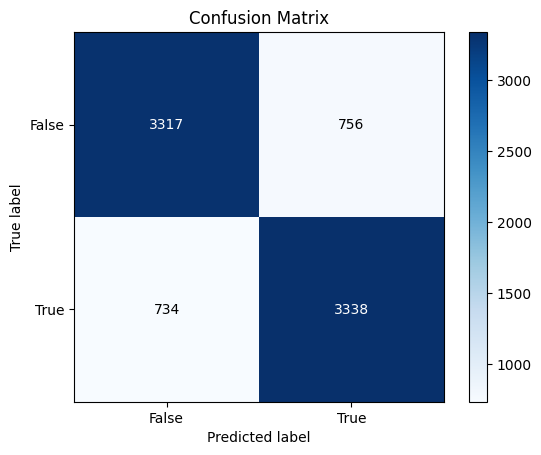

In [78]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

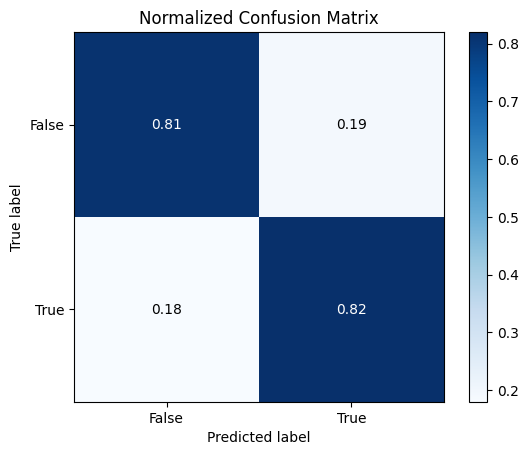

In [79]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

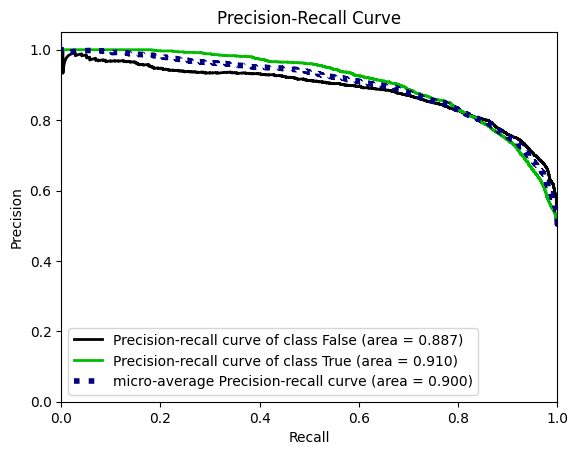

In [80]:
skplt.metrics.plot_precision_recall(y_test, model.predict_proba(X_test))

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

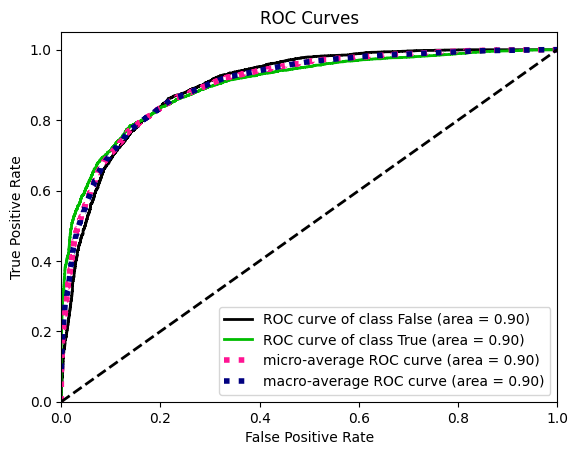

In [81]:
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

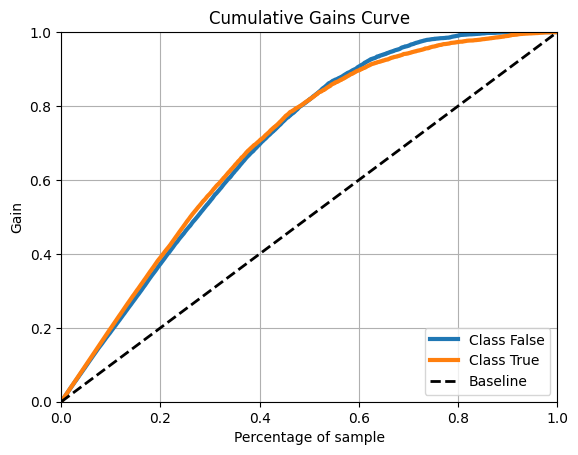

In [82]:
skplt.metrics.plot_cumulative_gain(y_test, model.predict_proba(X_test))

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

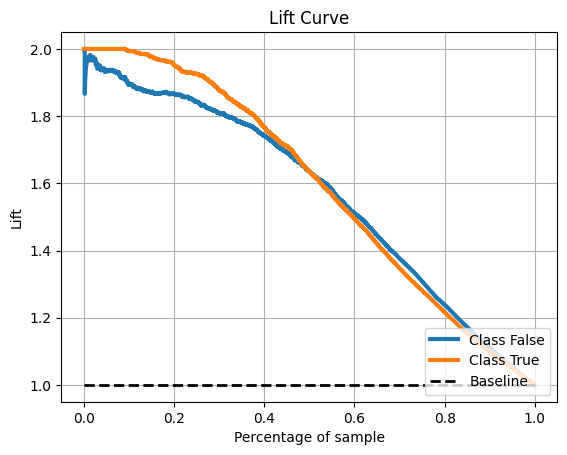

In [83]:
skplt.metrics.plot_lift_curve(y_test, model.predict_proba(X_test))

<Axes: title={'center': 'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

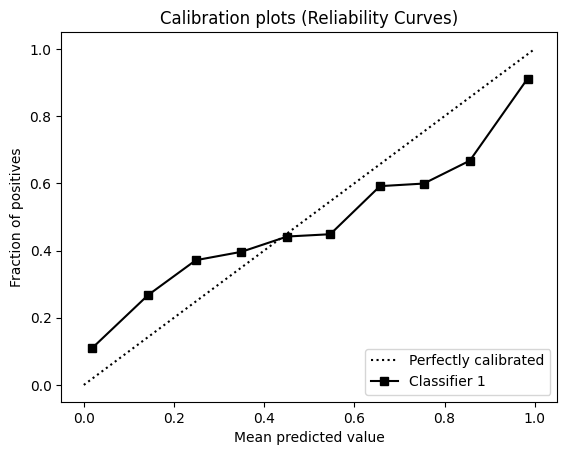

In [84]:
skplt.metrics.plot_calibration_curve(y_test, [model.predict_proba(X_test)])

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

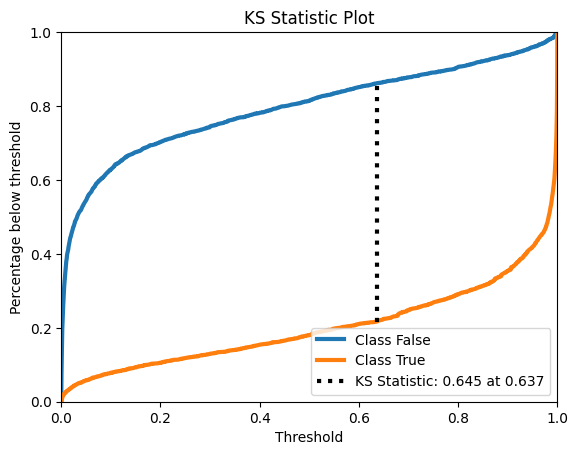

In [85]:
skplt.metrics.plot_ks_statistic(y_test, model.predict_proba(X_test))

## Feature Importance

In [86]:
# Determine feature importance for the classifier
from sklearn.inspection import permutation_importance

# This should match the number of CPU cores your executing environment uses
num_cores = 4

# Permuatation feature importance
importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=123, n_jobs=num_cores)
importance

{'importances_mean': array([0.1239607 , 0.01942243, 0.00578913, 0.00128252, 0.13283558,
        0.13521073, 0.13092562, 0.04294126, 0.02847869, 0.17756994,
        0.06018232]),
 'importances_std': array([0.00398125, 0.00183855, 0.00160839, 0.00079466, 0.00361901,
        0.0049191 , 0.00419118, 0.00217764, 0.00207941, 0.0045706 ,
        0.0026582 ]),
 'importances': array([[ 0.12502681,  0.1211821 ,  0.11581555,  0.12386734,  0.13144929,
          0.12670752,  0.12067105,  0.12688864,  0.12363031,  0.12436842],
        [ 0.02176566,  0.01901267,  0.01839133,  0.01820422,  0.02278672,
          0.02073193,  0.02043985,  0.01653398,  0.01839439,  0.01796358],
        [ 0.00859597,  0.00517144,  0.00569782,  0.00363855,  0.00467485,
          0.00722437,  0.00542656,  0.00363855,  0.00581662,  0.00800659],
        [ 0.00166659, -0.00075626,  0.00149321,  0.00121457,  0.00072736,
          0.00189094,  0.00202582,  0.00106038,  0.00209907,  0.00140356],
        [ 0.1306419 ,  0.13999321,

In [87]:
importance_rows = []

# For each importance in raw_importance, create a row in a dataframe containing its feature name and value
i = 0
for row in importance.importances:
    # Get the feature for the row based on the index
    feature = X_test.columns[i]
    i = i + 1

    for value in row:
        # Add the value and its feature to the rows
        importance_rows.append([feature, value])

# Create a data frame from this information
df_importance = pd.DataFrame(importance_rows, columns=['Feature', 'Importance'])
df_importance.head()

,Feature,Importance
0,Credit Amount,0.125027
1,Credit Amount,0.121182
2,Credit Amount,0.115816
3,Credit Amount,0.123867
4,Credit Amount,0.131449


In [88]:
# Order feature importance by largest to smallest value
df_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Aggregate by feature and limit by top 10
df_importance_agg = df_importance.groupby('Feature').mean().sort_values(by='Importance', ascending=False).head(7)

# Filter df_importance down to just features in df_importance_agg
df_importance = df_importance[df_importance['Feature'].isin(df_importance_agg.index)]

fig = px.box(df_importance, x='Feature', y='Importance', title='Feature Importance', color='Feature', color_discrete_sequence=px.colors.sequential.Sunsetdark, points='suspectedoutliers')
fig.update_layout(showlegend=False, height=500)

fig.show()

In [89]:
from sklearn.inspection import plot_partial_dependence

# Plot the partial dependence of the top 2 features
plot_partial_dependence(model, X_test, df_importance_agg.index, n_jobs=num_cores)

## Overfitting Detection

/anaconda/envs/jupyter_env/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43083 instead
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45709 instead
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41983 instead
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42527 instead
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/distributed/node.py:182: User

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

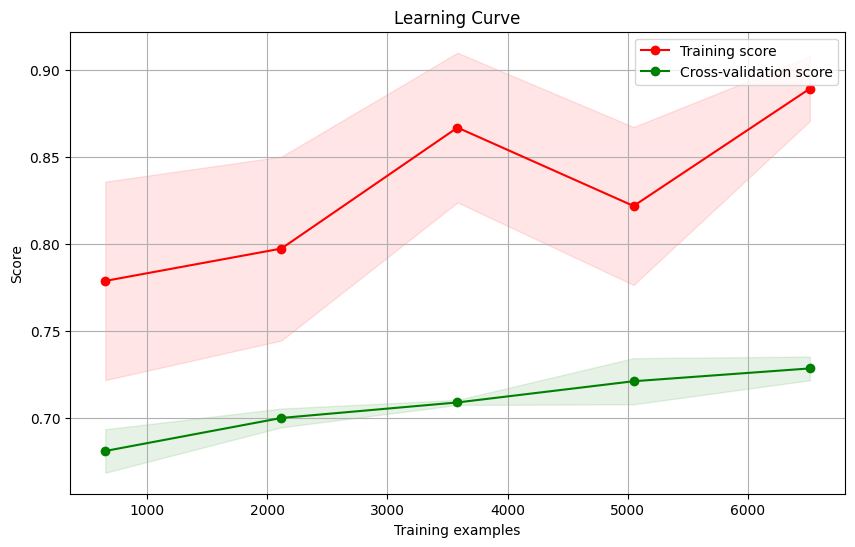

In [ ]:
skplt.estimators.plot_learning_curve(model, X_test, y_test, figsize=(10, 6), n_jobs=num_cores, random_state=123)

## Fairness

In [90]:
df_root = pd.read_csv('cleaned.csv', index_col=0)

df_root.head()

,Credit Amount,Is Male,Age in Years,Repay Delay Sep,Repay Delay Aug,Repay Delay Jul,Prior Pay Sep,Prior Pay Aug,Prior Pay Jul,Defaulted,Graduate School,Is Married,Prior Pay Total,Repay Delay Total
ID,,,,,,,,,,,,,,
1,20000,False,24,2,2,0,0,689,0,True,0,True,689,4
2,120000,False,26,0,2,0,0,1000,1000,True,0,False,5000,4
3,90000,False,34,0,0,0,1518,1500,1000,False,0,False,11018,0
4,50000,False,37,0,0,0,2000,2019,1200,False,0,True,8388,0
5,50000,True,57,0,0,0,2000,36681,10000,False,0,True,59049,0


In [91]:
# Merge the test data with the root data on their indexes to get the Is Male and Age in Years columns
df_fair = df_test.merge(df_root[['Is Male', 'Age in Years']], left_index=True, right_index=True)
df_fair.head()

,Credit Amount,Repay Delay Sep,Repay Delay Aug,Repay Delay Jul,Prior Pay Sep,Prior Pay Aug,Prior Pay Jul,Graduate School,Is Married,Prior Pay Total,Repay Delay Total,Defaulted,Is Male,Age in Years
15434,30000,0,0,0,1595,2000,5000,0,False,14295,0,False,True,29
26594,60000,0,0,0,2351,2242,3067,0,False,11653,0,True,True,32
14015,60000,2,0,0,2717,2929,2429,0,False,12649,2,True,False,36
7043,130000,0,0,0,2702,2207,2000,0,False,11641,0,False,False,26
9011,20000,0,0,0,1837,390,390,0,True,3397,0,False,True,41


### Fairness across genders

In [92]:
# Filter down to just male rows
df_fair_male = df_fair[df_fair['Is Male'] == True]

X_male = df_fair_male.drop(columns=['Defaulted', 'Is Male', 'Age in Years'])
y_male = df_fair_male['Defaulted']

y_pred_male = model.predict(X_male)

df_fair_male.shape

(1868, 14)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

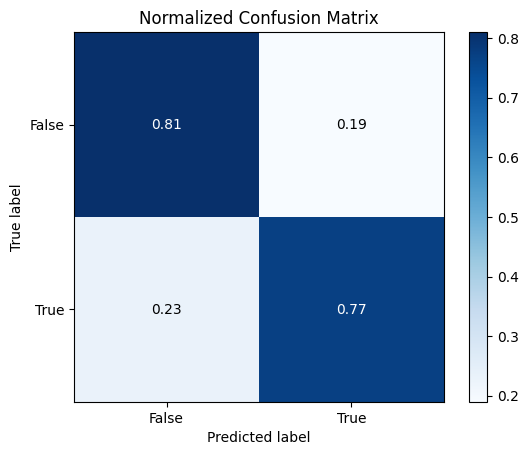

In [93]:
skplt.metrics.plot_confusion_matrix(y_male, y_pred_male, normalize=True)

In [94]:
# Filter down to non-male rows
df_fair_nonmale = df_fair[df_fair['Is Male'] == False]

X_nonmale = df_fair_nonmale.drop(columns=['Defaulted', 'Is Male', 'Age in Years'])
y_nonmale = df_fair_nonmale['Defaulted']

y_pred_nonmale = model.predict(X_nonmale)

df_fair_nonmale.shape

(3057, 14)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

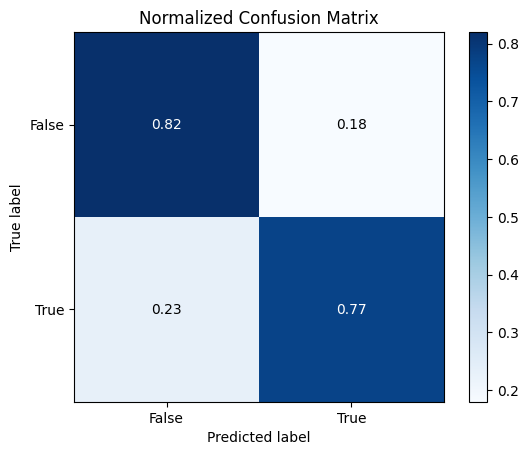

In [95]:
skplt.metrics.plot_confusion_matrix(y_nonmale, y_pred_nonmale, normalize=True)

### Fairness across ages

In [96]:
# Add a column for each age value indicating the prediction the model generates
df_fair_predicted = df_fair.copy()
df_fair_predicted['Prediction'] = model.predict(df_fair.drop(columns=['Is Male', 'Age in Years', 'Defaulted']))
df_fair_predicted['Is Correct'] = df_fair_predicted['Prediction'].eq(df_fair['Defaulted'])
df_fair_predicted.head()

,Credit Amount,Repay Delay Sep,Repay Delay Aug,Repay Delay Jul,Prior Pay Sep,Prior Pay Aug,Prior Pay Jul,Graduate School,Is Married,Prior Pay Total,Repay Delay Total,Defaulted,Is Male,Age in Years,Prediction,Is Correct
15434,30000,0,0,0,1595,2000,5000,0,False,14295,0,False,True,29,False,True
26594,60000,0,0,0,2351,2242,3067,0,False,11653,0,True,True,32,True,True
14015,60000,2,0,0,2717,2929,2429,0,False,12649,2,True,False,36,True,True
7043,130000,0,0,0,2702,2207,2000,0,False,11641,0,False,False,26,False,True
9011,20000,0,0,0,1837,390,390,0,True,3397,0,False,True,41,False,True


In [97]:
df_age_accuracy = pd.DataFrame(df_fair_predicted.groupby('Age in Years').mean()['Is Correct'])
df_age_accuracy.reset_index(inplace=True)
df_age_accuracy.head()

,Age in Years,Is Correct
0,21,1.000000
1,22,0.780000
2,23,0.851351
3,24,0.748603
4,25,0.819095


In [98]:
# Plot a line graph of the accuracy by age
fig = px.line(df_age_accuracy, x='Age in Years', y='Is Correct', title='Accuracy by Age', labels={'Is Correct': 'Accuracy'})
fig.update_layout(showlegend=False, height=500)
fig.update_yaxes(tickformat=".0%", range=[0, 1])
fig.update_xaxes(range=[0, 100])

fig.show()